In [1]:
import networkx as nx
import numpy as np

In [2]:
import numpy as np

# Read the content of 't2.txt' into a NumPy array
with open('t3.txt', 'r') as file:
    lines = file.read().splitlines()
data = [list(map(int, line.split())) for line in lines]
adjacency_matrix = np.array(data)

print(adjacency_matrix)


[[9 3 3 ... 4 4 4]
 [3 9 4 ... 0 2 4]
 [9 9 9 ... 9 9 9]
 ...
 [0 0 0 ... 9 0 3]
 [3 2 3 ... 9 9 9]
 [4 4 4 ... 3 0 9]]


In [3]:
for i in range(0,38):
    for j in range(0,38):
        if adjacency_matrix[i][j] <4 and adjacency_matrix[j][i] <4 and adjacency_matrix[i][j]!=0 and adjacency_matrix[j][i]!=0: #and not i==j:
            adjacency_matrix[i][j] =1
        else:
           adjacency_matrix[i][j] =0

print(adjacency_matrix)


[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


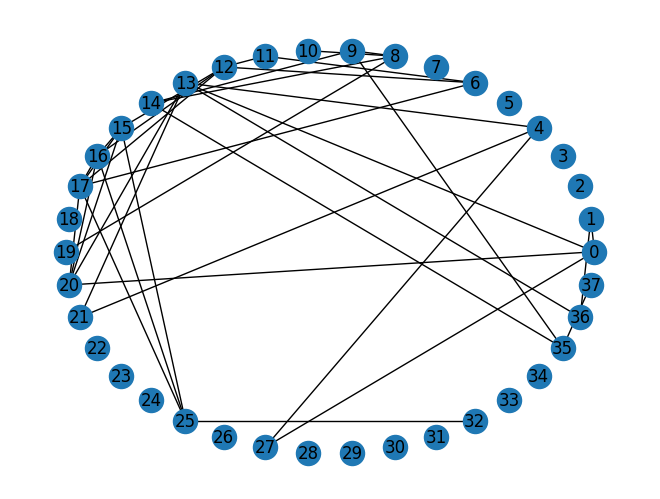

In [4]:
# Save the modified adjacency matrix to a new file
g = nx.from_numpy_array(adjacency_matrix)
# np.savetxt('modifiedt2_matrix.txt', adjacency_matrix, delimiter=' ')
#nx.draw_networkx(g)
nx.draw_circular(g,with_labels = True)

In [5]:
print(nx.density(g)) # diventare amici, piu che conoscenza-> mating

0.051209103840682786


In [6]:
print(nx.transitivity(g))
print()

# core...

0.46601941747572817



In [7]:
import numpy as np
# Read the content of 'cov1.txt' into a NumPy array
with open('cov1.txt', 'r') as file:
    lines = file.read().splitlines()
data = [list(map(int, line.split())) for line in lines]
adjacency_matrix2 = np.array(data)

print(adjacency_matrix2)

[[ 1  1  1  2  1 21 29 34 13  8 25 42 42 42 42 42 42 34  4  2  3]
 [ 2  1  1  0  2 24 28 36  7  2 22  2 29 36 36 23 32 28  4  2  2]
 [ 3  1  1  0  1 24 21 13 42 34 21 21 29 25 21 29 21 29  4  3  3]
 [ 4  1  2  0  2 30  6 21  0 32 21 21 38 36 17 21 21 35  4  3  3]
 [ 5  1  1  0  1 38 17 29 40 29 34  1 21  4 21 38  0 25  5  4  3]
 [ 6  1  2  0  1 18  4 21 10 26  5  0 38 14 10  5  2 32  3  2  2]
 [ 7  2  2  4  1 37  6 15 23 19 23 26 18 18 32 27  3  7  5  4  2]
 [ 8  2  1  5  4 36 21 21  2  2 21  0 25 21 42 34 27 32  4  3  2]
 [ 9  2  1  0  2 27 21  6  0  2 36  4 10 34 21 21 29 13  4  3  1]
 [10  2  1  0  2 27 30 18  0  0 13  6 19 21 38 22 34  6  5  4  5]
 [11  2  1  2  2 24 21 27 40 32  2  0 15  4 32 30 11  9  4  3  2]
 [12  2  2  5  1 38 34 29 17  4 13 25 25 21 38 34 25 34  4  2  2]
 [13  2  2  0  2 37 21 32 38  0 34  0 33 25 38 34  0 29  2  1  2]
 [14  1  1  0  1 32 21 27 36 36 21  3 36 21 24 34 31 27  5  3  2]
 [15  2  1  0  1 17 34 25 42 25 17  0 21  4 29 29  0 29  4  3  2]
 [16  2  2

In [8]:
matrix_meta = np.random.rand(38, 6)
for i in range(0,38):
    # Sex 1  (maschi 0, femmine 1)
    if adjacency_matrix2[i][1]== 2:
        matrix_meta[i][0] = 1
    elif adjacency_matrix2[i][1]== 1:
        matrix_meta[i][0] = 0
    # età 2 (18->0/22->1)
    if adjacency_matrix2[i][2] == 1:
        matrix_meta[i][1] = 0
    elif adjacency_matrix2[i][2] == 2:
        matrix_meta[i][1] = 1
    # Smoking 3 (1,2-> 0 no, resto si)
    if adjacency_matrix2[i][3] <= 2:
        matrix_meta[i][2] = 0
    if adjacency_matrix2[i][3] > 2:
        matrix_meta[i][2] = 1
    # Soft Drugs 4 (1,2 no, resto si)
    if adjacency_matrix2[i][4] <= 2:
        matrix_meta[i][3] = 0
    if adjacency_matrix2[i][4] > 2:
        matrix_meta[i][3] = 1
    # Religion 11  (1,20 ->0 no, 21,42->1 si)
    if adjacency_matrix2[i][11] <= 20:
        matrix_meta[i][4] = 0
    if adjacency_matrix2[i][11] > 20:
        matrix_meta[i][4] = 1
    # School Associations 16 (1,20->0 no, 21,42->1 si)
    if adjacency_matrix2[i][16] <= 20:
        matrix_meta[i][5] = 0
    if adjacency_matrix2[i][16] > 20:
        matrix_meta[i][5] = 1

print(matrix_meta)

[[0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 1. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [9]:
matrix_meta[20][:]

array([0., 1., 1., 0., 0., 0.])

In [10]:
dict = nx.degree_centrality(g)
dict

{0: 0.10810810810810811,
 1: 0.05405405405405406,
 2: 0.0,
 3: 0.0,
 4: 0.08108108108108109,
 5: 0.0,
 6: 0.08108108108108109,
 7: 0.0,
 8: 0.10810810810810811,
 9: 0.08108108108108109,
 10: 0.02702702702702703,
 11: 0.05405405405405406,
 12: 0.13513513513513514,
 13: 0.13513513513513514,
 14: 0.08108108108108109,
 15: 0.13513513513513514,
 16: 0.13513513513513514,
 17: 0.16216216216216217,
 18: 0.0,
 19: 0.02702702702702703,
 20: 0.13513513513513514,
 21: 0.05405405405405406,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.10810810810810811,
 26: 0.0,
 27: 0.05405405405405406,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.02702702702702703,
 33: 0.0,
 34: 0.0,
 35: 0.08108108108108109,
 36: 0.05405405405405406,
 37: 0.02702702702702703}

In [11]:
max_value = max(dict.values())
print(max_value)
#max_keys = [v for v, in dict.items() if v == max]
#print(max_keys)

0.16216216216216217


In [12]:
max_keys = [k for k, v in dict.items() if v == max]
print(max_keys) ## ----> KEY 17

[]


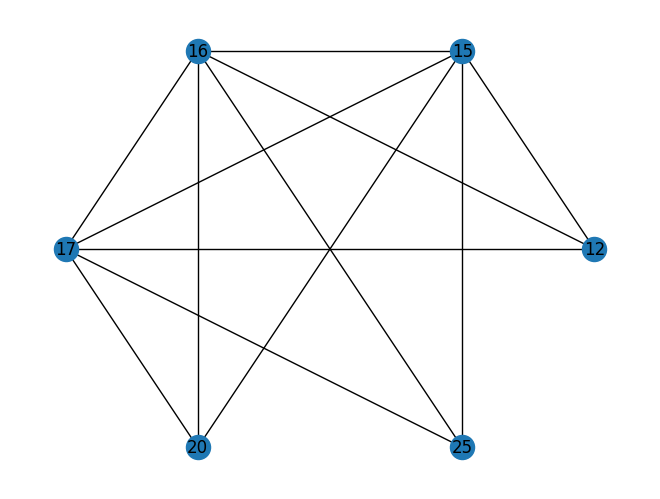

In [13]:
K = nx.k_core(g, k = 3)
nx.draw_circular(K,with_labels = True)

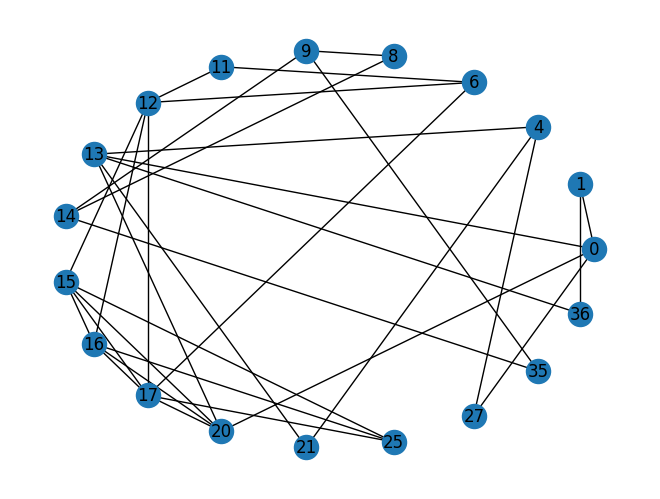

In [14]:
K = nx.k_core(g, k = 2)
nx.draw_circular(K,with_labels = True) ## ---> k = 3

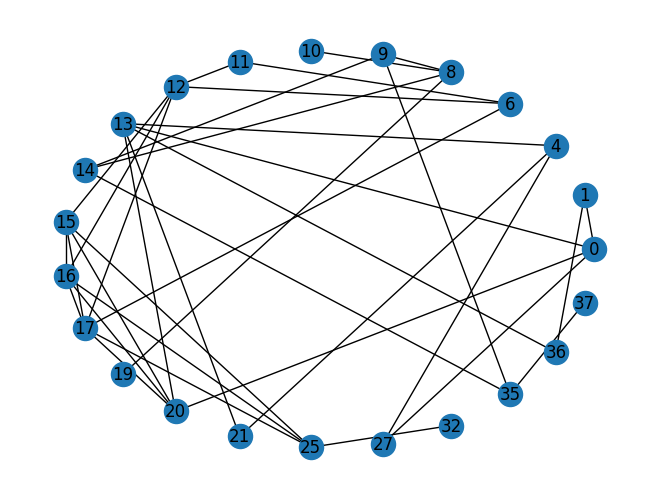

In [15]:
K = nx.k_core(g, k = 1)
nx.draw_circular(K,with_labels = True) ## ---> k = 1 TUTTI MENO QUELLI CHE HANNO LASCIATO

In [17]:
# Converte i valori in interi
for i in range(len(matrix_meta)):
    for j in range(len(matrix_meta[i])):
        matrix_meta[i][j] = int(matrix_meta[i][j])
# Apri il file in modalità di scrittura
with open("meta2.txt", "w") as file:
    # Scrittura della matrice nel file
    for row in matrix_meta:
        file.write("\t".join(map(str, row)) + "\n")


AttributeError: module 'matplotlib' has no attribute 'Line2D'

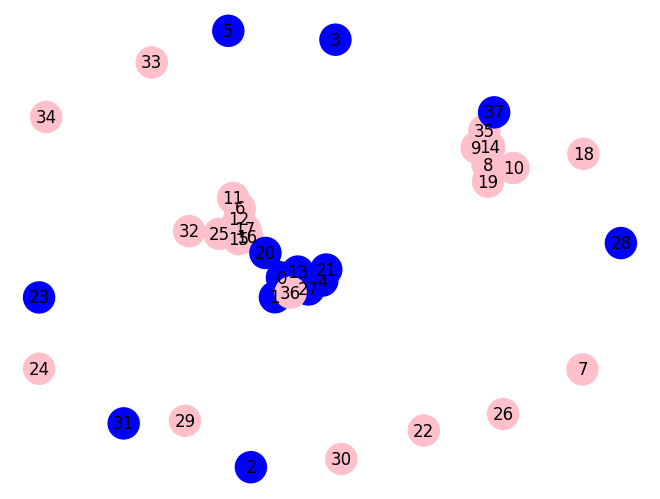

In [18]:
import matplotlib as plt
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 0: 'blue'}
color_legend = {1: 'Female', 2: 'Male'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[matrix_meta[node][0]] for node in g.nodes()]

# Draw the graph with node colors
# pos = nx.spring_layout(g)  # You can choose a different layout if desired
# nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)
nx.draw(g, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show(with_labels = True)
#nx.draw_circular(K,with_labels = True)

AttributeError: module 'matplotlib' has no attribute 'Line2D'

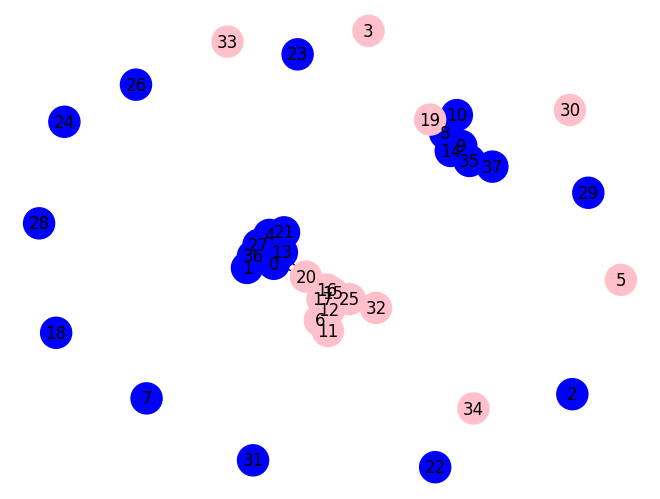

In [19]:
import matplotlib as plt
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 0: 'blue'}
color_legend = {1: '22', 2: '18'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[matrix_meta[node][1]] for node in g.nodes()]

# Draw the graph with node colors
# pos = nx.spring_layout(g)  # You can choose a different layout if desired
# nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)
nx.draw(g, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show(with_labels = True)
#nx.draw_circular(K,with_labels = True)

AttributeError: module 'matplotlib' has no attribute 'Line2D'

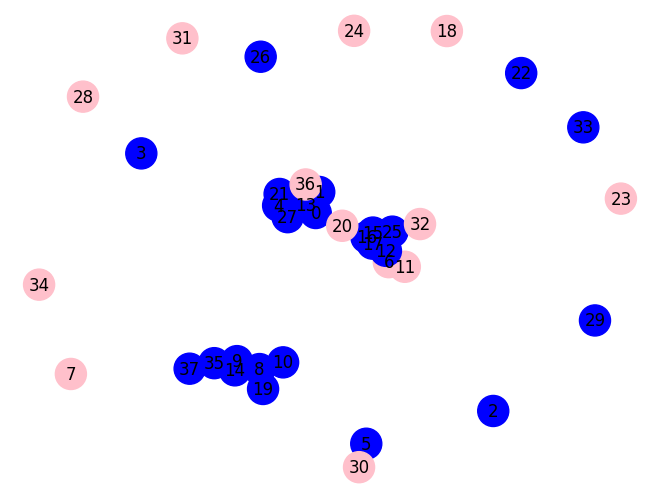

In [20]:
import matplotlib as plt
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 0: 'blue'}
color_legend = {1: 'fuma', 2: 'non fuma'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[matrix_meta[node][2]] for node in g.nodes()]

# Draw the graph with node colors
# pos = nx.spring_layout(g)  # You can choose a different layout if desired
# nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)
nx.draw(g, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show(with_labels = True)
#nx.draw_circular(K,with_labels = True)

AttributeError: module 'matplotlib' has no attribute 'Line2D'

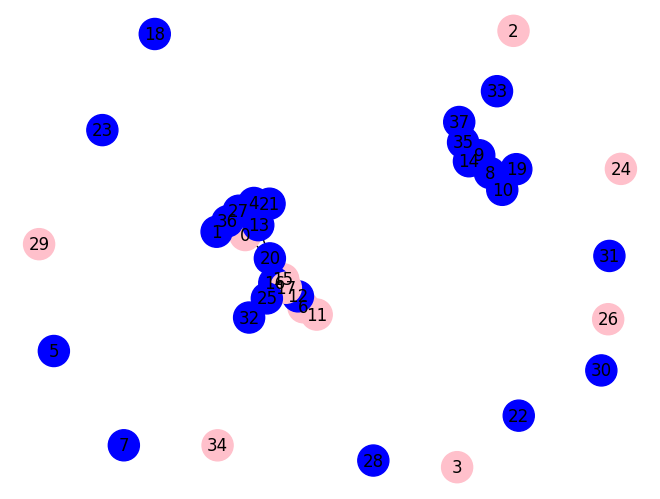

In [21]:
import matplotlib as plt
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 0: 'blue'}
color_legend = {1: 'religioso', 2: 'non'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[matrix_meta[node][4]] for node in g.nodes()]

# Draw the graph with node colors
# pos = nx.spring_layout(g)  # You can choose a different layout if desired
# nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)
nx.draw(g, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show(with_labels = True)
#nx.draw_circular(K,with_labels = True)

AttributeError: module 'matplotlib' has no attribute 'Line2D'

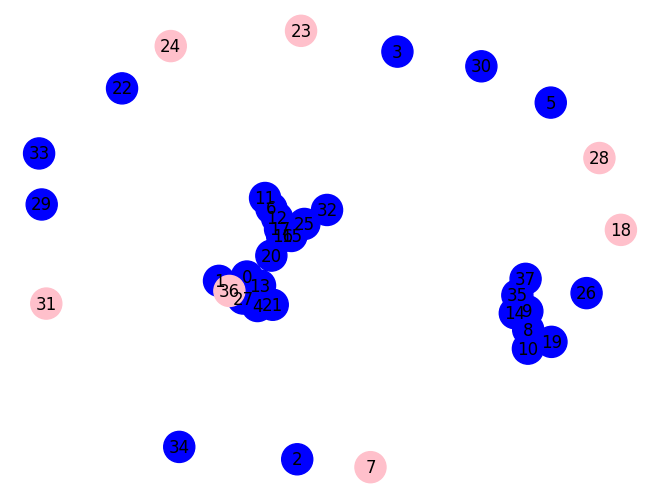

In [22]:
import matplotlib as plt
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 0: 'blue'}
color_legend = {1: 'soft_drugs', 2: 'non'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[matrix_meta[node][3]] for node in g.nodes()]

# Draw the graph with node colors
# pos = nx.spring_layout(g)  # You can choose a different layout if desired
# nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)
nx.draw(g, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show(with_labels = True)
#nx.draw_circular(K,with_labels = True)

AttributeError: module 'matplotlib' has no attribute 'Line2D'

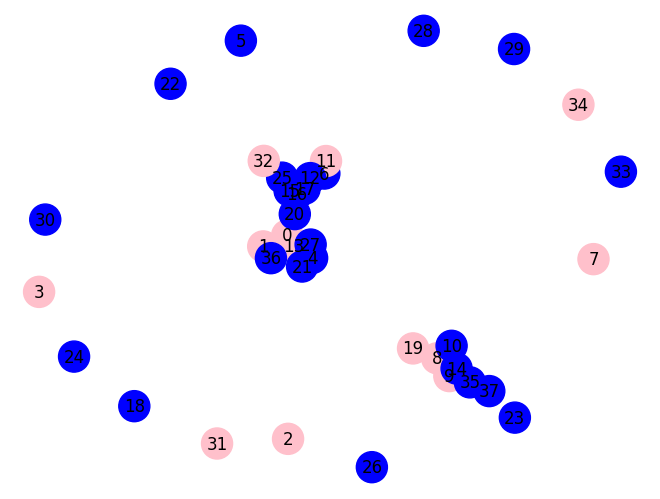

In [23]:
import matplotlib as plt
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 0: 'blue'}
color_legend = {1: 'school_association', 2: 'non'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[matrix_meta[node][5]] for node in g.nodes()]

# Draw the graph with node colors
# pos = nx.spring_layout(g)  # You can choose a different layout if desired
# nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)
nx.draw(g, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show(with_labels = True)
#nx.draw_circular(K,with_labels = True)

In [24]:
import numpy as np

# Read the content of 't2.txt' into a NumPy array
with open('t3.txt', 'r') as file:
    lines = file.read().splitlines()
data = [list(map(int, line.split())) for line in lines]
adjacency_matrix2 = np.array(data)


In [25]:
# FALSITà _>DIRECTED GRAPH

for i in range(0,38):
    for j in range(0,38):
        if adjacency_matrix2[i][j] <4 and adjacency_matrix2[i][j]!=0: #and not i==j:
            adjacency_matrix2[i][j] =1
        else:
           adjacency_matrix2[i][j] =0



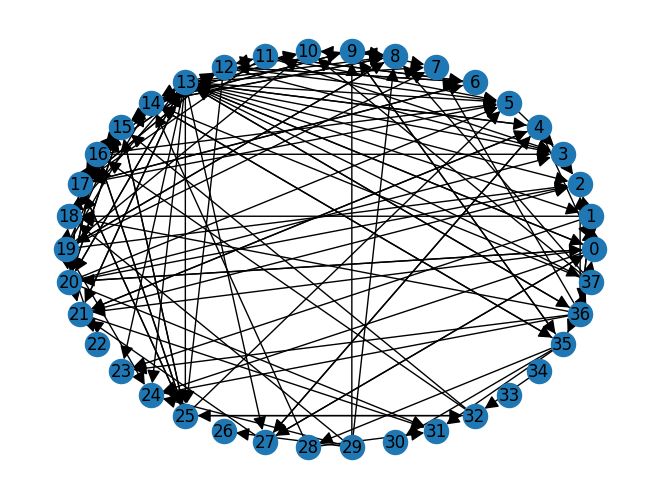

In [26]:
# Save the modified adjacency matrix to a new file
#gD = nx.from_numpy_array(adjacency_matrix2)
# np.savetxt('modifiedt2_matrix.txt', adjacency_matrix, delimiter=' ')
#nx.draw_networkx(g)

gD = nx.DiGraph(adjacency_matrix2)
nx.draw_circular(gD,with_labels = True, arrows = True, arrowstyle = '-|>', arrowsize = 20)

In [27]:
dict2 = nx.degree_centrality(gD)

In [28]:
max_value = max(dict2.values())
print(max_value)

0.7027027027027027


In [29]:
dict2

{0: 0.35135135135135137,
 1: 0.1891891891891892,
 2: 0.1891891891891892,
 3: 0.16216216216216217,
 4: 0.21621621621621623,
 5: 0.21621621621621623,
 6: 0.16216216216216217,
 7: 0.10810810810810811,
 8: 0.2972972972972973,
 9: 0.21621621621621623,
 10: 0.16216216216216217,
 11: 0.1891891891891892,
 12: 0.35135135135135137,
 13: 0.7027027027027027,
 14: 0.2972972972972973,
 15: 0.35135135135135137,
 16: 0.3783783783783784,
 17: 0.3783783783783784,
 18: 0.13513513513513514,
 19: 0.32432432432432434,
 20: 0.40540540540540543,
 21: 0.24324324324324326,
 22: 0.02702702702702703,
 23: 0.08108108108108109,
 24: 0.13513513513513514,
 25: 0.2972972972972973,
 26: 0.02702702702702703,
 27: 0.16216216216216217,
 28: 0.08108108108108109,
 29: 0.13513513513513514,
 30: 0.02702702702702703,
 31: 0.10810810810810811,
 32: 0.13513513513513514,
 33: 0.0,
 34: 0.02702702702702703,
 35: 0.24324324324324326,
 36: 0.2702702702702703,
 37: 0.16216216216216217}

In [30]:
matrix_meta[13][:]

array([0., 0., 0., 0., 0., 1.])

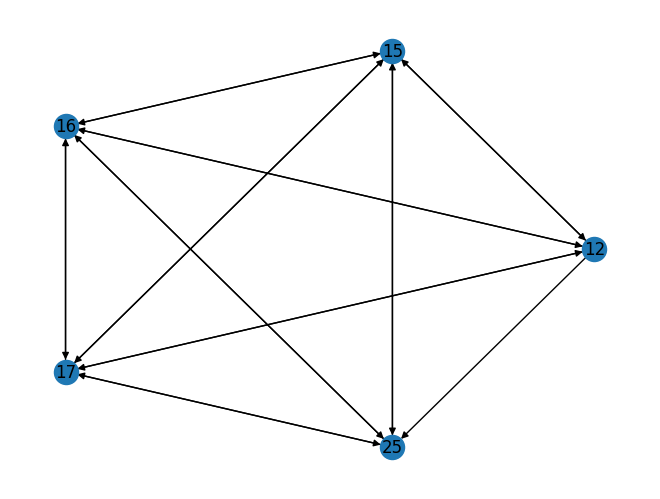

In [31]:
K2 = nx.k_core(gD, k = None)
nx.draw_circular(K2,with_labels = True) # GRUPPO PIU MASCHIO

In [32]:
# IN DEGREE
dict3 = nx.in_degree_centrality(gD)
dict3

{0: 0.16216216216216217,
 1: 0.08108108108108109,
 2: 0.1891891891891892,
 3: 0.16216216216216217,
 4: 0.08108108108108109,
 5: 0.1891891891891892,
 6: 0.08108108108108109,
 7: 0.10810810810810811,
 8: 0.1891891891891892,
 9: 0.10810810810810811,
 10: 0.13513513513513514,
 11: 0.05405405405405406,
 12: 0.13513513513513514,
 13: 0.13513513513513514,
 14: 0.1891891891891892,
 15: 0.21621621621621623,
 16: 0.1891891891891892,
 17: 0.1891891891891892,
 18: 0.13513513513513514,
 19: 0.02702702702702703,
 20: 0.16216216216216217,
 21: 0.13513513513513514,
 22: 0.02702702702702703,
 23: 0.08108108108108109,
 24: 0.13513513513513514,
 25: 0.16216216216216217,
 26: 0.02702702702702703,
 27: 0.08108108108108109,
 28: 0.02702702702702703,
 29: 0.0,
 30: 0.02702702702702703,
 31: 0.10810810810810811,
 32: 0.05405405405405406,
 33: 0.0,
 34: 0.0,
 35: 0.08108108108108109,
 36: 0.05405405405405406,
 37: 0.05405405405405406}

In [33]:
dict4 =nx.out_degree_centrality(gD)
dict4

{0: 0.1891891891891892,
 1: 0.10810810810810811,
 2: 0.0,
 3: 0.0,
 4: 0.13513513513513514,
 5: 0.02702702702702703,
 6: 0.08108108108108109,
 7: 0.0,
 8: 0.10810810810810811,
 9: 0.10810810810810811,
 10: 0.02702702702702703,
 11: 0.13513513513513514,
 12: 0.21621621621621623,
 13: 0.5675675675675675,
 14: 0.10810810810810811,
 15: 0.13513513513513514,
 16: 0.1891891891891892,
 17: 0.1891891891891892,
 18: 0.0,
 19: 0.2972972972972973,
 20: 0.24324324324324326,
 21: 0.10810810810810811,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.13513513513513514,
 26: 0.0,
 27: 0.08108108108108109,
 28: 0.05405405405405406,
 29: 0.13513513513513514,
 30: 0.0,
 31: 0.0,
 32: 0.08108108108108109,
 33: 0.0,
 34: 0.02702702702702703,
 35: 0.16216216216216217,
 36: 0.21621621621621623,
 37: 0.10810810810810811}

In [34]:
nx.betweenness_centrality(gD)

{0: 0.04690106773440107,
 1: 0.0016891891891891893,
 2: 0.0,
 3: 0.0,
 4: 0.00782449115782449,
 5: 0.0005630630630630631,
 6: 0.0010447947947947948,
 7: 0.0,
 8: 0.16504004004004005,
 9: 0.018080580580580582,
 10: 0.0,
 11: 0.0006256256256256255,
 12: 0.024972293722293714,
 13: 0.2468486343486344,
 14: 0.062499999999999986,
 15: 0.07856815148481816,
 16: 0.04349557891224558,
 17: 0.06599039515706184,
 18: 0.0,
 19: 0.1510885885885886,
 20: 0.21740490490490494,
 21: 0.03234901568234902,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.02010939510939511,
 26: 0.0,
 27: 0.0004379379379379379,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.024774774774774775,
 33: 0.0,
 34: 0.0,
 35: 0.045733233233233236,
 36: 0.007972257972257972,
 37: 0.025775775775775778}

In [36]:
nx.transitivity(g)

0.46601941747572817